### Clustering with HMMs

From: Clustering Sequences with Hidden Markov Models by Padhraic Smyth


https://papers.nips.cc/paper/1217-clustering-sequences-with-hidden-markov-models.pdf

In [1]:
import sys
import logging
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.mixture
import sklearn.cluster
import sklearn.model_selection
import scipy.cluster
import scipy.spatial
import pandas as pd

In [2]:
sns.set()

In [3]:
sys.path.insert(0, "..")


In [4]:
from hmm import GaussianHMM, distance, plots, HMMCluster, PoissonHMM, CategoricalHMM

In [5]:
pi_1 = [.5, .5]

A_1 = [[.6, .4],
       [.4, .6]]
means_1 = [0, 4]
var_1 = [2, 1]
pi_2 = pi_1
A_2 = [[.4, .6],
      [.6, .4]]
means_2 = means_1
var_2 = var_1

In [6]:
n_clusters = 2
n_states = 2

### Generate sequences from two HMMS
The only differences are in the hidden state transition matrices.  The emissions are the same.

In [7]:

model_1 = GaussianHMM.GaussianHMM(init_pi=None, init_A=None, init_emissions=None, n_iterations=0)
model_1.pi_ = pi_1
model_1.A_ = A_1
model_1.means_ = means_1
model_1.variances_ = var_1
model_2 = GaussianHMM.GaussianHMM(init_pi=None, init_A=None, init_emissions=None, n_iterations=0)
model_2.pi_ = pi_2
model_2.A_ = A_2
model_2.means_ = means_2
model_2.variances_ = var_2

In [8]:
observed_1, hidden_1 = model_1.sample(1, 200)
observed_2, hidden_2 = model_2.sample(1, 200)

### Sample Sequence from Model 1

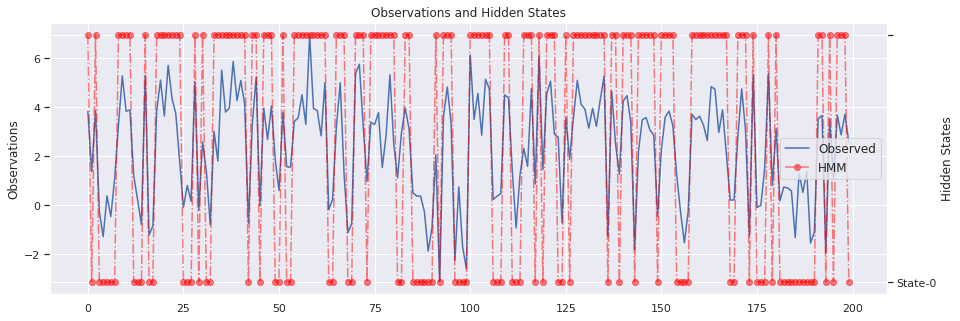

In [9]:
_ = plots.plot_hmm_states(observed_1[0], hidden_1[0])

### Sample Sequence from Model 2

In [10]:
_ = plots.plot_hmm_states(observed_2[0], hidden_2[0])

### Distribution of values
Both sampled sequences have similar observation value distributions

In [11]:
f, ax = plt.subplots(figsize=(10, 10))
sns.distplot(observed_1, label="Model-1", ax=ax)
sns.distplot(observed_2, label="Model-2", ax=ax)
ax.legend(loc="best")


/home/matthew/pkgsrc/install.20190210/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [12]:
observed_1.T

array([[ 3.83436091],
       [ 1.37059748],
       [ 3.8690789 ],
       [-0.25949457],
       [-1.28892976],
       [ 0.37814186],
       [-0.4638642 ],
       [ 1.08506066],
       [ 3.27297142],
       [ 5.28320678],
       [ 3.83955325],
       [ 3.8900472 ],
       [ 1.20345578],
       [ 0.2304079 ],
       [-0.78929068],
       [ 5.30162646],
       [-1.22954808],
       [-0.84387637],
       [ 3.85705997],
       [ 5.11105531],
       [ 3.64505176],
       [ 5.71439949],
       [ 4.36015711],
       [ 3.73542571],
       [ 1.79594541],
       [-0.08227366],
       [ 0.80625843],
       [ 0.15635219],
       [ 5.04910764],
       [-0.20506337],
       [ 2.57974849],
       [ 1.37280259],
       [-0.79727658],
       [ 3.01039924],
       [ 1.80091033],
       [ 5.52154732],
       [ 3.80411521],
       [ 3.96980538],
       [ 5.8740616 ],
       [ 4.27562738],
       [ 5.09829479],
       [ 4.13544591],
       [-0.7356919 ],
       [ 3.30747913],
       [ 5.22980223],
       [-0

### Generate sample data

In [13]:
def sample_and_split(models, n_samples = 100, sample_lengths=200):

    observations = []
    labels = []
    for i, m in enumerate(models):
        labels += [i] * n_samples
        observed, _ = m.sample(n_samples, sample_lengths)
        observations += observed.tolist()
    observations = np.asarray(observations)

    train_idx, test_idx = sklearn.model_selection.train_test_split(np.arange(observations.shape[0]), test_size=.7, stratify=labels)

    test_labels = np.asarray([labels[i] for i in test_idx])
    train_labels = np.asarray([labels[i] for i in train_idx])

    test_observations = observations[test_idx]
    training_observations = observations[train_idx]
    return training_observations, test_observations, train_labels, test_labels



### Cluster the sequences

* Train an hmm on each sequence
* Then use a distance-based clustering algorith on the distance of each per-sequence-hmm.
* Then train models on the clusters of sequences
* Further fit the models on groups of sequences.
* Build a composite model with block-diagonal transition matrices.

In [14]:
train_observations, test_observations, train_labels, test_labels = sample_and_split([model_1, model_2])

In [15]:
clusterer = HMMCluster.GaussianHMMDistanceCluster(
    n_clusters=2, 
    hmm_impl=GaussianHMM.GaussianHMM(n_components=2, n_iterations=500, tol=1e-6, n_inits=10, verbose=0),
    
)

In [16]:
clusterer.fit(train_observations)

../hmm/HMMBase.py:141: UserWarning: Training did not converge! Consider running for more iterations or choosing different starting values
  self.loglikelihoods_ = trainer.train(X, iterations=self.n_iterations, tol=self.tol)
../hmm/HMMBase.py:141: UserWarning: Training did not converge! Consider running for more iterations or choosing different starting values
  self.loglikelihoods_ = trainer.train(X, iterations=self.n_iterations, tol=self.tol)
../hmm/HMMBase.py:141: UserWarning: Training did not converge! Consider running for more iterations or choosing different starting values
  self.loglikelihoods_ = trainer.train(X, iterations=self.n_iterations, tol=self.tol)
../hmm/HMMBase.py:141: UserWarning: Training did not converge! Consider running for more iterations or choosing different starting values
  self.loglikelihoods_ = trainer.train(X, iterations=self.n_iterations, tol=self.tol)
../hmm/HMMBase.py:141: UserWarning: Training did not converge! Consider running for more iterations or c

GaussianHMMDistanceCluster(cluster_linkage='average',
              hmm_impl=GaussianHMM(allowed_to_use_log=True, implementation='scaling',
      init_A='random', init_emissions='kmeans', init_pi='random',
      n_components=2, n_inits=10, n_iterations=1000, n_jobs=-1,
      random_state=None, tol=1e-06, variance_regularization=1e-06,
      verbose=0),
              n_clusters=2, n_iterations_1=100, n_iterations_2=1000)

### Composite transition matrix

In [17]:
clusterer.composite_model_.A_

array([[0.39577463, 0.60422537, 0.        , 0.        ],
       [0.60796757, 0.39203243, 0.        , 0.        ],
       [0.        , 0.        , 0.60405736, 0.39594264],
       [0.        , 0.        , 0.39864241, 0.60135759]])

In [18]:
predictions = clusterer.predict(test_observations)

In [19]:
HMMCluster.cluster_report(test_labels, predictions)

Mutual Info	0.656
Norm Mutual Info	0.946
Rand Score	0.971
Completeness	0.946
V-Measure	0.946


/home/matthew/pkgsrc/install.20190210/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [20]:
pd.crosstab(test_labels, predictions)

col_0   0   1
row_0        
0       0  70
1      69   1

### Kmeans

In [21]:
kmeans = sklearn.cluster.KMeans(n_clusters=2)

kmeans_predict = kmeans.fit_predict(np.asarray(test_observations))

In [22]:
HMMCluster.cluster_report(test_labels, kmeans_predict)

Mutual Info	0.009
Norm Mutual Info	0.014
Rand Score	0.010
Completeness	0.014
V-Measure	0.014


/home/matthew/pkgsrc/install.20190210/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [23]:
pd.crosstab(test_labels, kmeans_predict)

col_0   0   1
row_0        
0      29  41
1      20  50

## Poissons

In [24]:
pi_1 = [.5, .5]

A_1 = [[.6, .4],
       [.4, .6]]
means_1 = [4, 8]
pi_2 = pi_1
A_2 = [[.4, .6],
      [.6, .4]]
means_2 = means_1


In [25]:

model_1 = PoissonHMM.PoissonHMM(init_pi=None, init_A=None, init_emissions=None, n_iterations=0)
model_1.pi_ = pi_1
model_1.A_ = A_1
model_1.means_ = means_1
model_2 = PoissonHMM.PoissonHMM(init_pi=None, init_A=None, init_emissions=None, n_iterations=0)
model_2.pi_ = pi_2
model_2.A_ = A_2
model_2.means_ = means_2


In [26]:
observed_1, hidden_1 = model_1.sample(1, 200)
observed_2, hidden_2 = model_2.sample(1, 200)

### Sample Sequence from Model 0

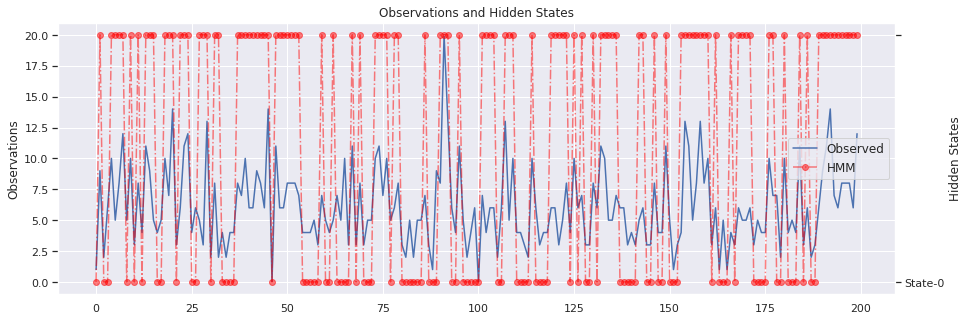

In [27]:
_ = plots.plot_hmm_states(observed_1[0], hidden_1[0])

### Sample Sequence from Model 1

In [28]:
_ = plots.plot_hmm_states(observed_2[0], hidden_2[0])

In [29]:
train_observations, test_observations, train_labels, test_labels = sample_and_split([model_1, model_2])

In [30]:
clusterer = HMMCluster.PoissonHMMDistanceCluster(
    n_clusters=2, 
    hmm_impl=PoissonHMM.PoissonHMM(n_components=2, n_iterations=500, tol=1e-6, n_inits=1, verbose=0),
    
)

In [31]:
clusterer.fit(train_observations)


../hmm/HMMBase.py:141: UserWarning: Training did not converge! Consider running for more iterations or choosing different starting values
  self.loglikelihoods_ = trainer.train(X, iterations=self.n_iterations, tol=self.tol)
../hmm/HMMBase.py:141: UserWarning: Training did not converge! Consider running for more iterations or choosing different starting values
  self.loglikelihoods_ = trainer.train(X, iterations=self.n_iterations, tol=self.tol)
../hmm/HMMBase.py:141: UserWarning: Training did not converge! Consider running for more iterations or choosing different starting values
  self.loglikelihoods_ = trainer.train(X, iterations=self.n_iterations, tol=self.tol)
../hmm/HMMBase.py:141: UserWarning: Training did not converge! Consider running for more iterations or choosing different starting values
  self.loglikelihoods_ = trainer.train(X, iterations=self.n_iterations, tol=self.tol)
../hmm/HMMBase.py:141: UserWarning: Training did not converge! Consider running for more iterations or c

PoissonHMMDistanceCluster(cluster_linkage='average',
             hmm_impl=PoissonHMM(allowed_to_use_log=True, implementation='scaling', init_A='random',
      init_emissions='kmeans', init_pi='random', n_components=2, n_inits=1,
      n_iterations=1000, n_jobs=-1, random_state=None, tol=1e-06,
      verbose=0),
             n_clusters=2, n_iterations_1=100, n_iterations_2=1000)

In [32]:
predictions = clusterer.predict(test_observations)
train_prediction = clusterer.predict(train_observations)

In [33]:
clusterer.composite_model_.pi_

array([0.39779703, 0.19980963, 0.28367812, 0.11871522])

In [34]:
pd.crosstab(train_prediction, train_labels)

col_0   0   1
row_0        
0      29   8
1       1  22

In [35]:
HMMCluster.cluster_report(train_labels, train_prediction)

Mutual Info	0.303
Norm Mutual Info	0.446
Rand Score	0.482
Completeness	0.455
V-Measure	0.445


/home/matthew/pkgsrc/install.20190210/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [36]:
pd.crosstab(predictions, test_labels)

col_0   0   1
row_0        
0      64  15
1       6  55

In [37]:
HMMCluster.cluster_report(test_labels, predictions)

Mutual Info	0.279
Norm Mutual Info	0.405
Rand Score	0.486
Completeness	0.407
V-Measure	0.405


In [38]:
print(sklearn.metrics.classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        70
           1       0.90      0.79      0.84        70

   micro avg       0.85      0.85      0.85       140
   macro avg       0.86      0.85      0.85       140
weighted avg       0.86      0.85      0.85       140



In [39]:
predictions

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0])

In [40]:
test_labels

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0])

## Categorical

In [41]:
pi_1 = [.5, .5]

A_1 = [[.6, .4],
       [.4, .6]]

pi_2 = pi_1
A_2 = [[.4, .6],
      [.6, .4]]
B_1 = [[.5, .5, 0],
       [.2, 0, .8]]
B_2 = [[.5, .4, .1],
       [.25, .25, .5]]

In [42]:

model_1 = CategoricalHMM.CategoricalHMM(init_pi=None, init_A=None, init_emissions=None, n_iterations=0)
model_1.pi_ = pi_1
model_1.A_ = A_1
model_1.B_ = B_1

model_2 = CategoricalHMM.CategoricalHMM(init_pi=None, init_A=None, init_emissions=None, n_iterations=0)
model_2.pi_ = pi_2
model_2.A_ = A_2
model_2.B_ = B_2


In [43]:
observed_1, hidden_1 = model_1.sample(1, 200)
observed_2, hidden_2 = model_2.sample(1, 200)

In [44]:
observed_1

array([[0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0, 1,
        1, 0, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1,
        2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 2, 1, 2,
        2, 2, 1, 0, 2, 0, 0, 0, 1, 0, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
        0, 0, 2, 1, 1, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2,
        0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1,
        0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1,
        1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1,
        1, 0, 2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1,
        1, 1]])

In [45]:
observed_2

array([[0, 1, 2, 1, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2,
        2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2,
        2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2,
        0, 2, 2, 1, 0, 1, 1, 2, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 2,
        0, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 2, 2, 0, 0, 0, 2, 1, 2, 0,
        1, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0,
        0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 2,
        0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 1, 1, 1, 2,
        2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 2, 1, 0,
        2, 0]])

In [46]:
train_observations, test_observations, train_labels, test_labels = sample_and_split([model_1, model_2])

In [47]:
clusterer = HMMCluster.CategoricalHMMDistanceCluster(
    n_clusters=2, 
    n_iterations_1=200,
    n_iterations_2=5000,
    hmm_impl=CategoricalHMM.CategoricalHMM(
        n_components=2, n_iterations=1000, tol=1e-3, n_inits=1
    )
)

In [48]:
clusterer.fit(train_observations)

../hmm/HMMBase.py:141: UserWarning: Training did not converge! Consider running for more iterations or choosing different starting values
  self.loglikelihoods_ = trainer.train(X, iterations=self.n_iterations, tol=self.tol)
../hmm/HMMBase.py:141: UserWarning: Training did not converge! Consider running for more iterations or choosing different starting values
  self.loglikelihoods_ = trainer.train(X, iterations=self.n_iterations, tol=self.tol)
../hmm/HMMBase.py:141: UserWarning: Training did not converge! Consider running for more iterations or choosing different starting values
  self.loglikelihoods_ = trainer.train(X, iterations=self.n_iterations, tol=self.tol)
../hmm/HMMBase.py:141: UserWarning: Training did not converge! Consider running for more iterations or choosing different starting values
  self.loglikelihoods_ = trainer.train(X, iterations=self.n_iterations, tol=self.tol)
../hmm/HMMBase.py:141: UserWarning: Training did not converge! Consider running for more iterations or c

CategoricalHMMDistanceCluster(cluster_linkage='average',
               hmm_impl=CategoricalHMM(allowed_to_use_log=True, implementation='scaling',
        init_A='random', init_emissions='random', init_pi='random',
        n_components=2, n_features=None, n_inits=1, n_iterations=5000,
        n_jobs=-1, random_state=None, smoothing=None, tol=0.001, verbose=0),
               n_clusters=2, n_iterations_1=200, n_iterations_2=5000)

In [49]:
train_predictions = clusterer.predict(train_observations)
predictions = clusterer.predict(test_observations)

In [50]:
pd.crosstab(train_labels, train_predictions)

col_0   0   1
row_0        
0       0  30
1      30   0

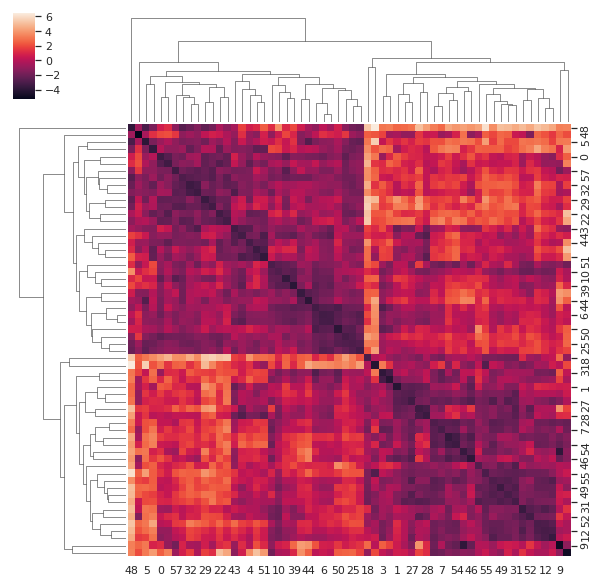

In [51]:
sns.clustermap(clusterer.lls_)

In [52]:
clusterer.composite_model_.predict_log_proba(train_observations)

array([-220.77163879, -216.31819417, -214.73823188, -220.66553126,
       -218.92714205, -218.80918069, -220.25796711, -216.2575341 ,
       -221.36869674, -217.06236416, -219.40856403, -220.74789431,
       -215.63910363, -216.99587184, -211.90776511, -212.11232001,
       -214.13764302, -221.04394362, -208.15867459, -216.99941261,
       -213.21881639, -219.5788718 , -217.61081409, -213.86056642,
       -218.35617346, -219.33780434, -212.19083399, -215.07081237,
       -217.13834638, -219.98209749, -220.31383009, -213.39895638,
       -218.19010581, -218.74379579, -220.44428991, -218.38730138,
       -215.15347719, -215.76585624, -219.4676248 , -221.04977321,
       -220.76176047, -213.36888212, -210.73116094, -217.98224896,
       -220.2457925 , -219.51075487, -215.49306353, -218.48847821,
       -218.47700188, -214.19043538, -221.12731002, -217.8024866 ,
       -217.35290698, -219.13841494, -214.64313158, -210.21984274,
       -219.5151356 , -219.11616631, -219.48749203, -218.35902

In [53]:
clusterer.composite_model_.transform(train_observations)[:, -1]

array([2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2,
       3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2])

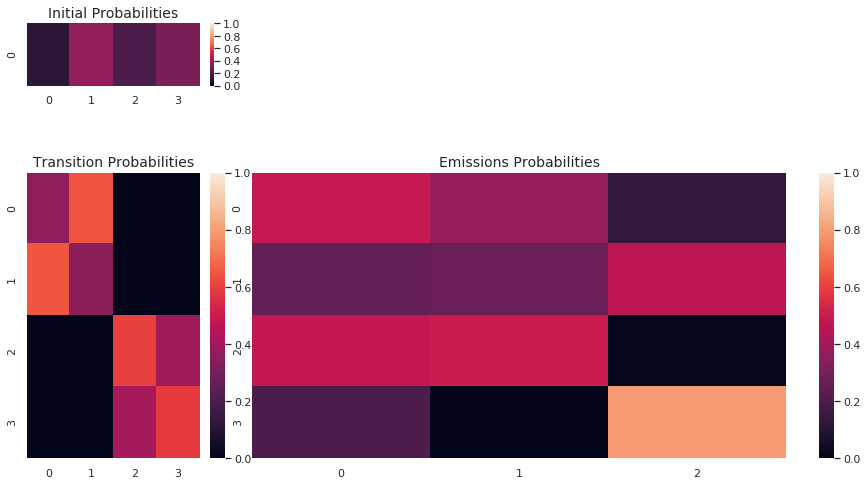

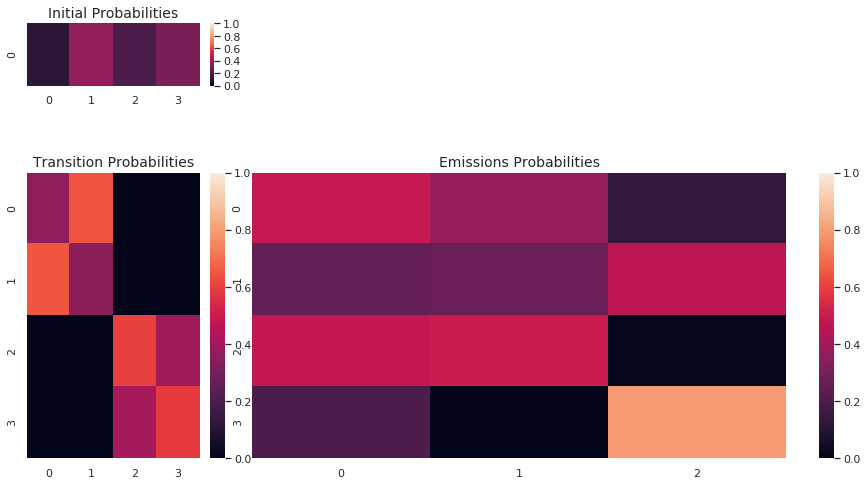

In [54]:
plots.hinton_diagram(
clusterer.composite_model_.pi_,
clusterer.composite_model_.A_,
clusterer.composite_model_.B_,
    vmin=0, vmax=1)

In [55]:
pd.crosstab(test_labels, predictions)

col_0   0   1
row_0        
0       7  63
1      69   1

In [56]:
HMMCluster.cluster_report(test_labels, predictions)

Mutual Info	0.489
Norm Mutual Info	0.708
Rand Score	0.783
Completeness	0.710
V-Measure	0.708


/home/matthew/pkgsrc/install.20190210/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [57]:
clusterer.composite_model_.A_

array([[0.35765168, 0.64234832, 0.        , 0.        ],
       [0.64793047, 0.35206953, 0.        , 0.        ],
       [0.        , 0.        , 0.60465254, 0.39534746],
       [0.        , 0.        , 0.41190151, 0.58809849]])

In [58]:
pd.DataFrame(clusterer.composite_model_.B_)

0         1         2
0  0.490147  0.375269  0.134584
1  0.260283  0.271111  0.468606
2  0.486635  0.501397  0.011968
3  0.202655  0.000741  0.796604